In [1]:
#We've learnt while working on decision trees, the basic principle of ensembles and random forests.
#A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

In [2]:
#Dataset: 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
#then the ensembler...
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.score(X_test, y_test)
    print(clf.__class__.__name__, y_pred)

LogisticRegression 0.8415
RandomForestClassifier 0.856
SVC 0.874
VotingClassifier 0.8685


In [4]:
#Note:
#If all classifiers are able to estimate class probabilities (i.e., they have a predict_proba() method), 
#then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. 
#This is called soft voting.
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)
#then the ensembler...
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='soft')
voting_clf.fit(X_train, y_train)
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.score(X_test, y_test)
    print(clf.__class__.__name__, y_pred)
#Like so... Notice the change to the svm_clf(bro doesn't return probabilities so we have to add that)

LogisticRegression 0.8415
RandomForestClassifier 0.855
SVC 0.874
VotingClassifier 0.8725


In [5]:
#Bagging and Pasting in Scikit-Learn: essentially what we did in the decision tree aspect, where we trained the same classifier,
#on various subsets of the train data and then run a prediction accross all the models, then picking the most common prediction accross all predictions.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_score = bag_clf.score(X_test,y_test)
#Alright this is pretty much self explanatory: train 500 decision trees each on 100 samples randomly selected 
#(with replacement:bagging=> "bootstrap = True" without replacement:pasting=> "bootstrap = False") from the train dataset.

In [6]:
y_score

0.876

In [24]:
#Out of bag evaluation(OOB evaluation) put simply, when sampling with replacement, 
#about 37% of the data is not sampled, this 37 % can be used to evaluate the ensembler
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [25]:
#To do this all we have to add is oob_score = True and then to evaluate:
bag_clf.oob_score_
#Note we must be sampling with replacement i.e. bootstrap = True.

0.838

In [26]:
#lets compare this to the accuracy on the test set:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)
#Well not far off... this way we may not have to split the dataset into train and test instances.

0.8505

In [27]:
#The decision function for each oon instance can also be obtained:
bag_clf.oob_decision_function_

array([[0.9015544 , 0.0984456 ],
       [0.99470899, 0.00529101],
       [0.32044199, 0.67955801],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.6875    , 0.3125    ]])

In [17]:
#The BaggingClassifier class supports sampling the features as well. This is controlled by two hyperparameters: 
#max_features and bootstrap_features. They work he same way as max_samples and bootstrap, 
#but for feature sampling instead of instance sampling. Thus, each predictor will be trained on a random subset of the input features.
#example:
bag_features_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
bootstrap=True,  bootstrap_features=True, n_jobs=-1, oob_score=True)
bag_features_clf.fit(X_train, y_train)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [18]:
from sklearn.metrics import accuracy_score
y_features_pred = bag_features_clf.predict(X_test)
accuracy_score(y_test, y_features_pred)

0.8515

In [19]:
bag_features_clf.oob_decision_function_

array([[0.85142857, 0.14857143],
       [0.97802198, 0.02197802],
       [0.55      , 0.45      ],
       ...,
       [0.14356436, 0.85643564],
       [0.12716763, 0.87283237],
       [0.72625698, 0.27374302]])

In [20]:
#Side note:
#This is particularly useful when you are dealing with high-dimensional inputs (suchas images). 
#Sampling both training instances and features is called the RandomPatches method.
#Keeping all training instances (i.e., bootstrap=False and max_samples=1.0) but 
#sampling features (i.e., bootstrap_features=True and/or max_features smaller than 1.0) is called the Random Subspaces method.

In [22]:
#Random forest classifiers:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_test, y_test)

0.8705

In [28]:
#The following BaggingClassifier is roughly equivalent to the previous RandomForestClassifier:
bag_forest_clf = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

In [29]:
bag_forest_clf.fit(X_train, y_train)
bag_forest_clf.score(X_test, y_test)

0.8715

In [32]:
#Extra randomness when growing the trees...
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
extra_trees_clf.fit(X_train, y_train)
extra_trees_clf.score(X_test, y_test)

0.8665

In [33]:
#Feature Importance: scikit learn helps us to determine the importance of features when building a forest classifier
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_): print(name, score)


sepal length (cm) 0.10566091878253982
sepal width (cm) 0.02788187528587666
petal length (cm) 0.4291501472242806
petal width (cm) 0.43730705870730296


In [35]:
#Boosting: Ada Boost:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
#An AdaBoost classifier on a decision tree: 
ada_clf.score(X_test, y_test)

0.861

In [55]:
#Boosting: Gradient Boosting
import numpy as np
X_r = 2 * np.random.rand(100, 1)
y_r = 4 + 3 * X_r + np.random.randn(100, 1)
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_r, y_r.ravel())

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [56]:
gbrt.predict([[1.5]])

array([8.32065767])

In [51]:
#In order to find the optimal number of trees, you can use early stopping
from sklearn.metrics import mean_squared_error
X_r_train, X_r_val, y_r_train, y_r_val = train_test_split(X_r, y_r)
gbrt_early_stopped = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt_early_stopped.n_estimators = n_estimators
    gbrt_early_stopped.fit(X_r_train, y_r_train.ravel())
    y_r_pred = gbrt.predict(X_r_val)
    val_error = mean_squared_error(y_r_val, y_r_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

In [57]:
gbrt_early_stopped.score(X_r_val, y_r_val)

0.540465083741391

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def image_plotter(image):
    some_digit = image
    some_digit_image = np.array(some_digit).reshape(28, 28)
    plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [2]:
#Exercises:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
import numpy as np
X,y = mnist['data'], mnist['target']
X = X.to_numpy()
y = y.to_numpy()
y = y.astype(np.uint8)
X_train, X_test, X_val, y_train, y_test, y_val = X[:50000], X[50000:60000],  X[60000:70000],  y[:50000], y[50000:60000],  y[60000:70000]

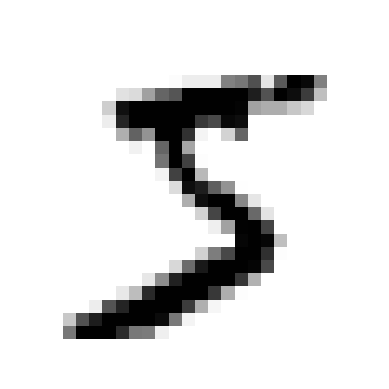

In [5]:
image_plotter(X[0])

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)
#then the ensembler...
voting_clf = VotingClassifier(estimators=[('lr', et_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='soft')
for clf in (et_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.score(X_val, y_val)
    print(clf.__class__.__name__, y_pred)

ExtraTreesClassifier 0.8182
RandomForestClassifier 0.969
SVC 0.9785
VotingClassifier 0.9777


In [28]:
new_X = list(zip(et_clf.predict(X_val), rnd_clf.predict(X_val), svm_clf.predict(X_val), voting_clf.predict(X_val)))

In [31]:
blend_svm_clf = SVC(probability = True)
blend_svm_clf.fit(new_X, y_val)

SVC(probability=True)

In [32]:
classifiers_predictions = list(zip(et_clf.predict(X_test), rnd_clf.predict(X_test), svm_clf.predict(X_test), voting_clf.predict(X_test)))

In [33]:
blend_predictions = blend_svm_clf.predict(classifiers_predictions)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,blend_predictions)

0.9746

In [36]:
voting_clf.score(X_test, y_test)

0.9804

In [37]:
blend_predictions

array([3, 8, 6, ..., 5, 6, 8], dtype=uint8)